In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 
import cv2 
import os

C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
# img = image.load_img("database/train/humans/1.jpg")

In [4]:
# plt.imshow(img)

In [5]:
train = ImageDataGenerator ( rescale=1/255 ) 
validation = ImageDataGenerator ( rescale = 1/255 )

In [6]:
train_dataset = train.flow_from_directory ( "database/train/" ,
                                           target_size= (200,200) ,
                                           batch_size = 3 ,
                                           class_mode = 'binary' )

validation_dataset = validation.flow_from_directory ( "database/validation/" ,
                                           target_size= (200,200) ,
                                           batch_size = 3 ,
                                           class_mode = 'binary' )


Found 36 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'birds': 0, 'humans': 1}

In [29]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D( 16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D ( 2,2 ),
                                    # 
                                    tf.keras.layers.Conv2D(32 ,(3,3 ) , activation = 'relu' ) ,
                                    tf.keras.layers.MaxPool2D( 2,2 ) ,
                                    #
                                    tf.keras.layers.Conv2D( 64 , ( 3 , 3 ) , activation = 'relu') ,
                                    tf.keras.layers.MaxPool2D ( 2,2 ) ,
                                    ##
                                    tf.keras.layers.Flatten( ) ,
                                    ##
                                    tf.keras.layers.Dense( 512 , activation = 'relu' ) ,
                                    tf.keras.layers.Dense ( 1 , activation = 'sigmoid') 
                                    ]) 

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = 0.001) ,
              metrics = ['accuracy'] )

In [33]:
model_fit = model.fit ( train_dataset ,
                       steps_per_epoch = 3 ,
                       epochs = 8 ,
                       validation_data = validation_dataset )

Epoch 1/8
3/3 [==============================] - 2s 511ms/step - loss: 0.4705 - acc: 0.7778 - val_loss: 0.4744 - val_acc: 0.8947
Epoch 2/8
3/3 [==============================] - 1s 468ms/step - loss: 0.2034 - acc: 1.0000 - val_loss: 1.2797 - val_acc: 0.5263
Epoch 3/8
3/3 [==============================] - 1s 462ms/step - loss: 1.2660 - acc: 0.4444 - val_loss: 0.6119 - val_acc: 0.6842
Epoch 4/8
3/3 [==============================] - 2s 520ms/step - loss: 0.6778 - acc: 0.7778 - val_loss: 0.6384 - val_acc: 0.6316
Epoch 5/8
3/3 [==============================] - 1s 460ms/step - loss: 0.9739 - acc: 0.6667 - val_loss: 0.5319 - val_acc: 0.8421
Epoch 6/8
3/3 [==============================] - 1s 444ms/step - loss: 0.3186 - acc: 1.0000 - val_loss: 0.4601 - val_acc: 0.8421
Epoch 7/8
3/3 [==============================] - 1s 456ms/step - loss: 0.3299 - acc: 0.7778 - val_loss: 0.4422 - val_acc: 0.8421
Epoch 8/8
3/3 [==============================] - 1s 477ms/step - loss: 0.2521 - acc: 1.0000 - val

In [12]:
# validation_dataset.class_indices

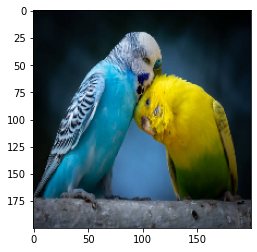

 Bird 


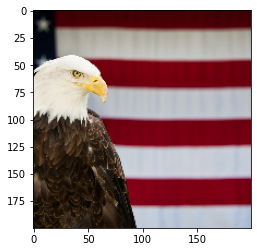

 Bird 


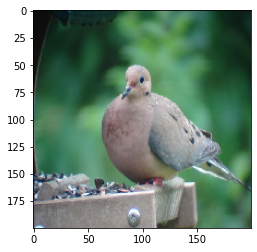

 Bird 


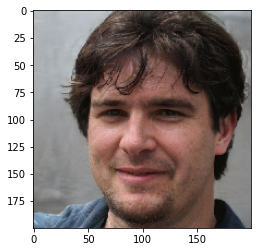

 Human 


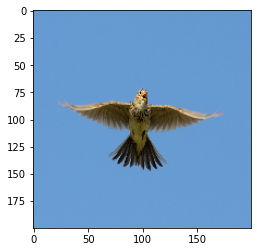

 Bird 


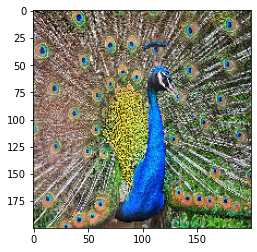

 Bird 


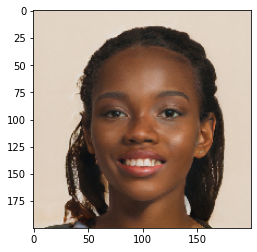

 Human 


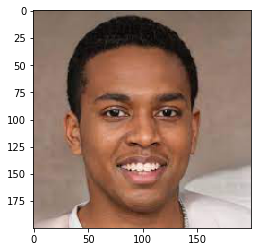

 Human 


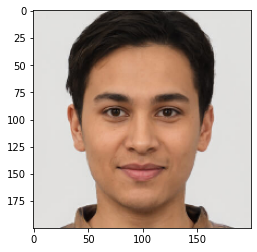

 Human 


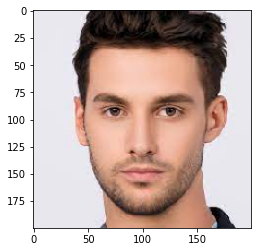

 Human 


In [38]:
dir_path = 'database/test' 
for i in os.listdir(dir_path) :
    img= image.load_img ( dir_path + '//' + i , target_size = ( 200,200 ) )
    plt.imshow( img ) 
    plt.show()
    
    X = image.img_to_array(img )
    X = np.expand_dims ( X , axis = 0 )
    images = np.vstack ( [ X ] )
    val= model.predict ( images )
    if val == 0 : 
        print ( " Bird " ) 
    else : 
        print ( " Human " )


In [35]:
def CNN(dir_path):    
    img= image.load_img ( dir_path, target_size = ( 200,200 ) )
    plt.imshow( img ) 
    plt.show()

    X = image.img_to_array(img )
    X = np.expand_dims ( X , axis = 0 )
    images = np.vstack ( [ X ] )
    val= model.predict ( images )
    if val == 0 : 
        return " Bird "  
    else : 
        return " Human " 

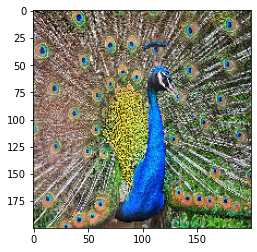

' Bird '

In [36]:
dir_path ='database/test/4.jpg'
CNN(dir_path)

In [46]:
model.save("CNNmodel2.h5")